<a href="https://colab.research.google.com/github/Leenasmk3/IT326-DataMining-Project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/Leenasmk3/IT326-DataMining-Project/main/Dataset/Preprocessed_dataset.csv")
display(df)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_log,Age_bin,Embarked_Q,Embarked_S
0,0,3,1,0.346939,0.5,0.0,0.133008,3,False,True
1,1,1,0,0.673469,0.5,0.0,0.712356,3,False,False
2,1,3,0,0.428571,0.0,0.0,0.154000,3,False,True
3,1,1,0,0.612245,0.5,0.0,0.635010,3,False,True
4,0,3,1,0.612245,0.0,0.0,0.157713,3,False,True
...,...,...,...,...,...,...,...,...,...,...
615,0,3,1,0.408163,0.0,0.0,0.126457,3,False,True
616,0,2,1,0.448980,0.0,0.0,0.274174,3,False,True
617,1,1,0,0.285714,0.0,0.0,0.486368,2,False,True
618,1,1,1,0.428571,0.0,0.0,0.486368,3,False,False


In [ ]:
df_copy = df.copy()

# Define the features (X) and target variable (y)
X = df_copy.drop(['Survived'], axis=1)   # Independent features
y = df_copy['Survived']


separated the independent variables (X) and the dependent variable (y). The independent variables (`X`) include features like `Age`, `Fare`, `Pclass`, etc. The dependent variable (`y`) is the column `Survived`, which indicates whether the passenger survived or not.


In [ ]:
# 1. Split data into 70% training and 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
model_70 = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model_70.fit(X_train_70, y_train_70)

# Make predictions on the test data
y_pred_70 = model_70.predict(X_test_30)


accuracy_70 = accuracy_score(y_test_30, y_pred_70)
print(f'Accuracy (70% training, 30% testing): {accuracy_70}')

Accuracy (70% training, 30% testing): 0.7795698924731183


split the data into training and testing sets using the train_test_split() function. 70% of the data is used for training, and 30% is used for testing.

initialized a Decision Tree Classifier using `DecisionTreeClassifier() to training data to learn how to classify whether passengers survived or not based on the available features.

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_70 = confusion_matrix(y_test_30, y_pred_70)
print("Confusion Matrix (70% training, 30% testing):")
print(cm_70)

Confusion Matrix (70% training, 30% testing):
[[97 22]
 [19 48]]


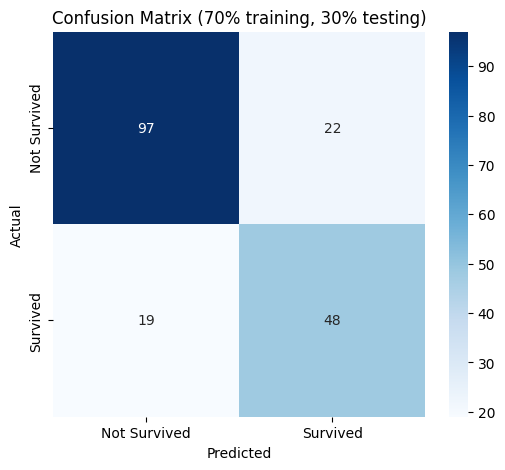

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (70% training, 30% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

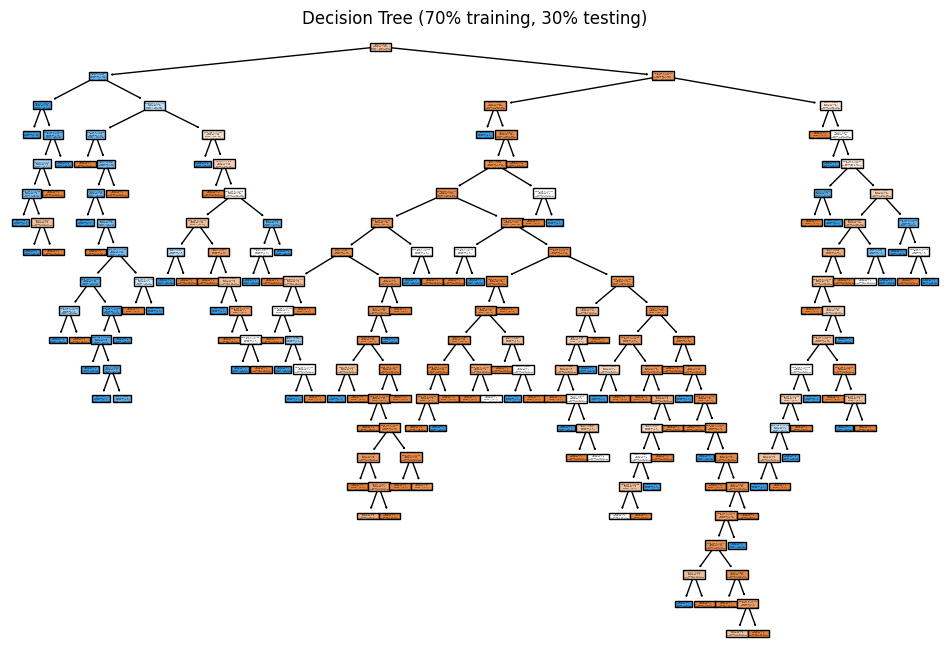

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(model_70, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (70% training, 30% testing)")
plt.show()

In [ ]:
# 2. Split data into 80% training and 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model again on this new split
model_80 = DecisionTreeClassifier(random_state=42)
model_80.fit(X_train_80, y_train_80)

# Make predictions
y_pred_80 = model_80.predict(X_test_20)

accuracy_80 = accuracy_score(y_test_20, y_pred_80)
print(f'Accuracy (80% training, 20% testing): {accuracy_80}')

Accuracy (80% training, 20% testing): 0.7419354838709677


In [ ]:
cm_80 = confusion_matrix(y_test_20, y_pred_80)
print("Confusion Matrix (80% training, 20% testing):")
print(cm_80)

Confusion Matrix (80% training, 20% testing):
[[59 18]
 [14 33]]


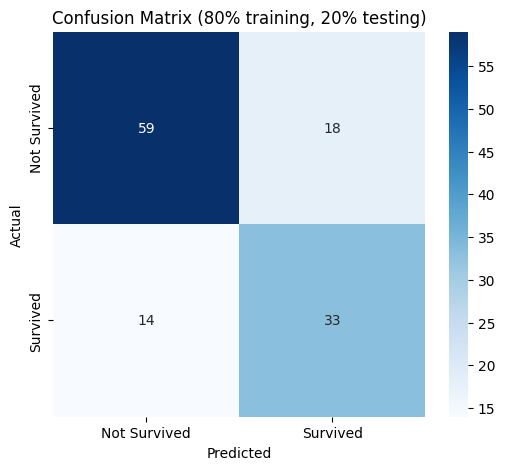

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (80% training, 20% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

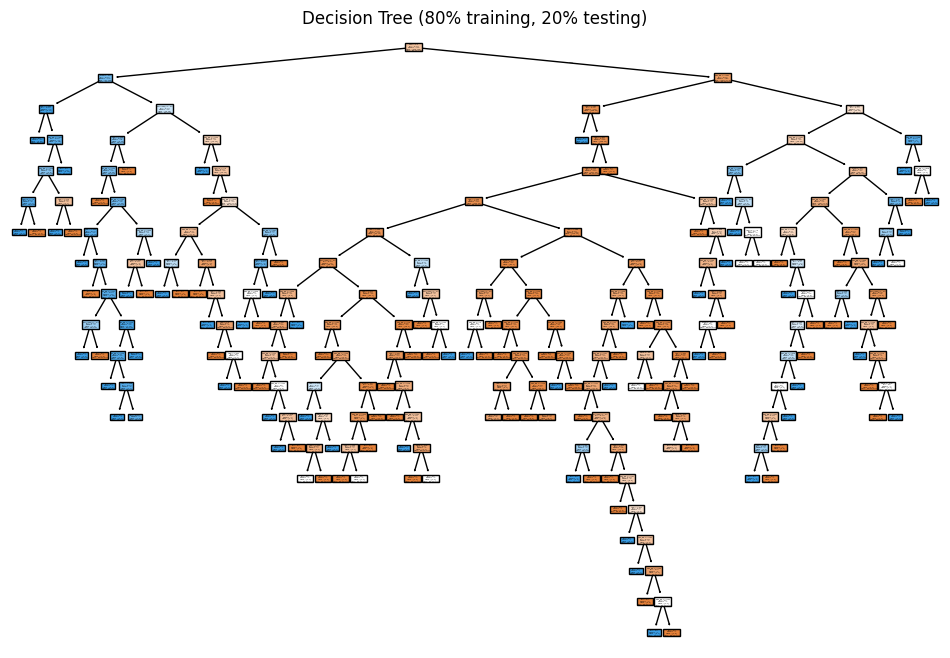

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model_80, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (80% training, 20% testing)")
plt.show()

In [ ]:
# 3. Split data into 60% training and 40% testing
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)
model_60 = DecisionTreeClassifier(random_state=42)
model_60.fit(X_train_60, y_train_60)
y_pred_60 = model_60.predict(X_test_40)
accuracy_60 = accuracy_score(y_test_40, y_pred_60)
print(f'Accuracy (60% training, 40% testing): {accuracy_60}')

Accuracy (60% training, 40% testing): 0.7661290322580645


In [ ]:
cm_60 = confusion_matrix(y_test_40, y_pred_60)
print("Confusion Matrix (60% training, 40% testing):")
print(cm_60)

Confusion Matrix (60% training, 40% testing):
[[131  27]
 [ 31  59]]


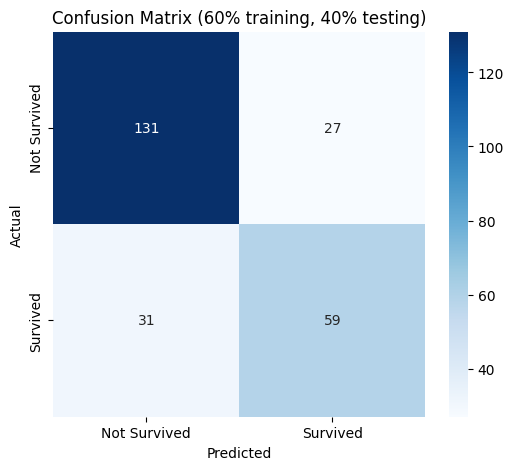

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_60, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (60% training, 40% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

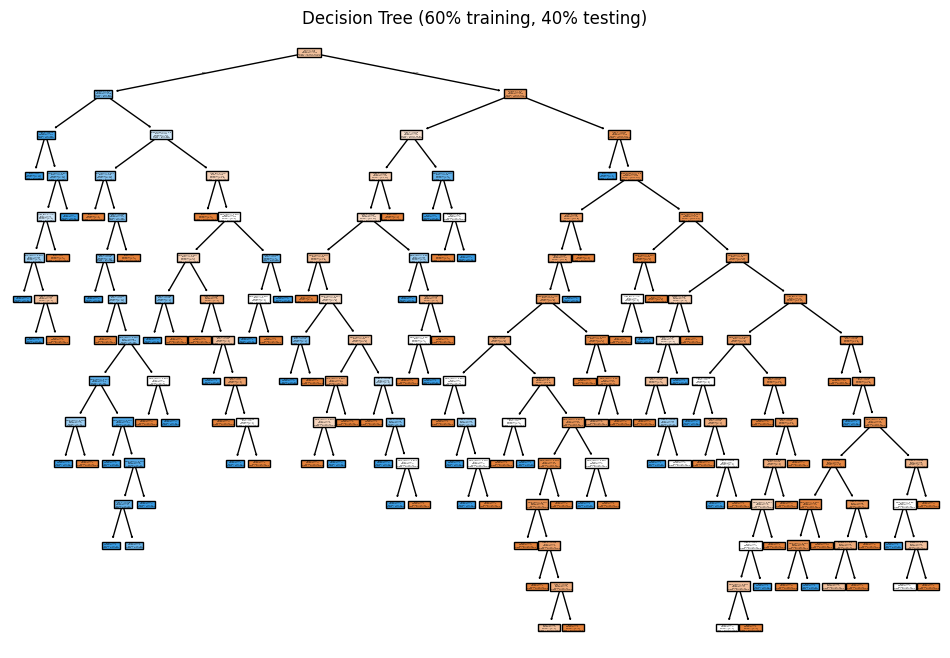

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model_60, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (60% training, 40% testing)")
plt.show()